**Network Intrusion dataset**

#Importation nécéssaire#

In [ ]:
!pip install -U imbalanced-learn
!pip install -q imblearn
!pip install scikeras
!pip install scikit-learn

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from keras.utils import to_categorical
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics



warnings.filterwarnings("ignore", category=FutureWarning)

#Exploration des données#

In [ ]:
file_path = "/Intrusion dataset.csv"

df = pd.read_csv(file_path)

In [ ]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.shape

(225745, 79)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [ ]:
df.isnull().sum()

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [ ]:
def unique_values_per_column(df):
    """
    Affiche les valeurs uniques pour chaque colonne dans un DataFrame.

    Arguments :
    - df : DataFrame pandas.

    Retourne :
    - Un dictionnaire où les clés sont les noms des colonnes et les valeurs sont les valeurs uniques.
    """
    unique_values = {}
    for col in df.columns:
        unique_values[col] = df[col].unique()
        print(f"Colonne '{col}': {len(unique_values[col])} valeurs uniques")
        print(unique_values[col])
        print("-" * 50)
    return unique_values

In [ ]:
unique_values = unique_values_per_column(df)

Colonne ' Destination Port': 23950 valeurs uniques
[54865 55054 55055 ... 39950 61301 61326]
--------------------------------------------------
Colonne ' Flow Duration': 187752 valeurs uniques
[    3   109    52 ... 55637 53596 21000]
--------------------------------------------------
Colonne ' Total Fwd Packets': 297 valeurs uniques
[   2    1    3   20   15    4    5    8   29    6   14   41   47   46
   45   27   23   26   51   50   48   52   49   21   42   43   44   78
   53   31   19   69   22   25   24   30   68   40   39   75   28   12
   17   18   13    7   11   38    9 1611   70   10  124   33   34   16
   54  225   56   32  220  103  390   97   58   72  111   85   71   73
   61   55   35  209  205  149  212  108   98   37  188  101   65   36
  114   91  246  100   62  102  105   79  106  122  277   76  126   82
   96  196   84  263   77   93   63   74   81   66  354  175   64  117
  107   92  457   67  142  135  116   60  143  112  120  155  214  201
  187  519  128  136  194

In [ ]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [ ]:
df[df.duplicated()]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2109,80,77,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2257,443,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2749,443,49,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2862,443,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2877,443,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225540,53,157,2,2,46,46,23,23,23.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225629,443,113,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225639,137,22,13,0,650,0,50,50,50.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225660,443,52,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.duplicated().sum()

2633

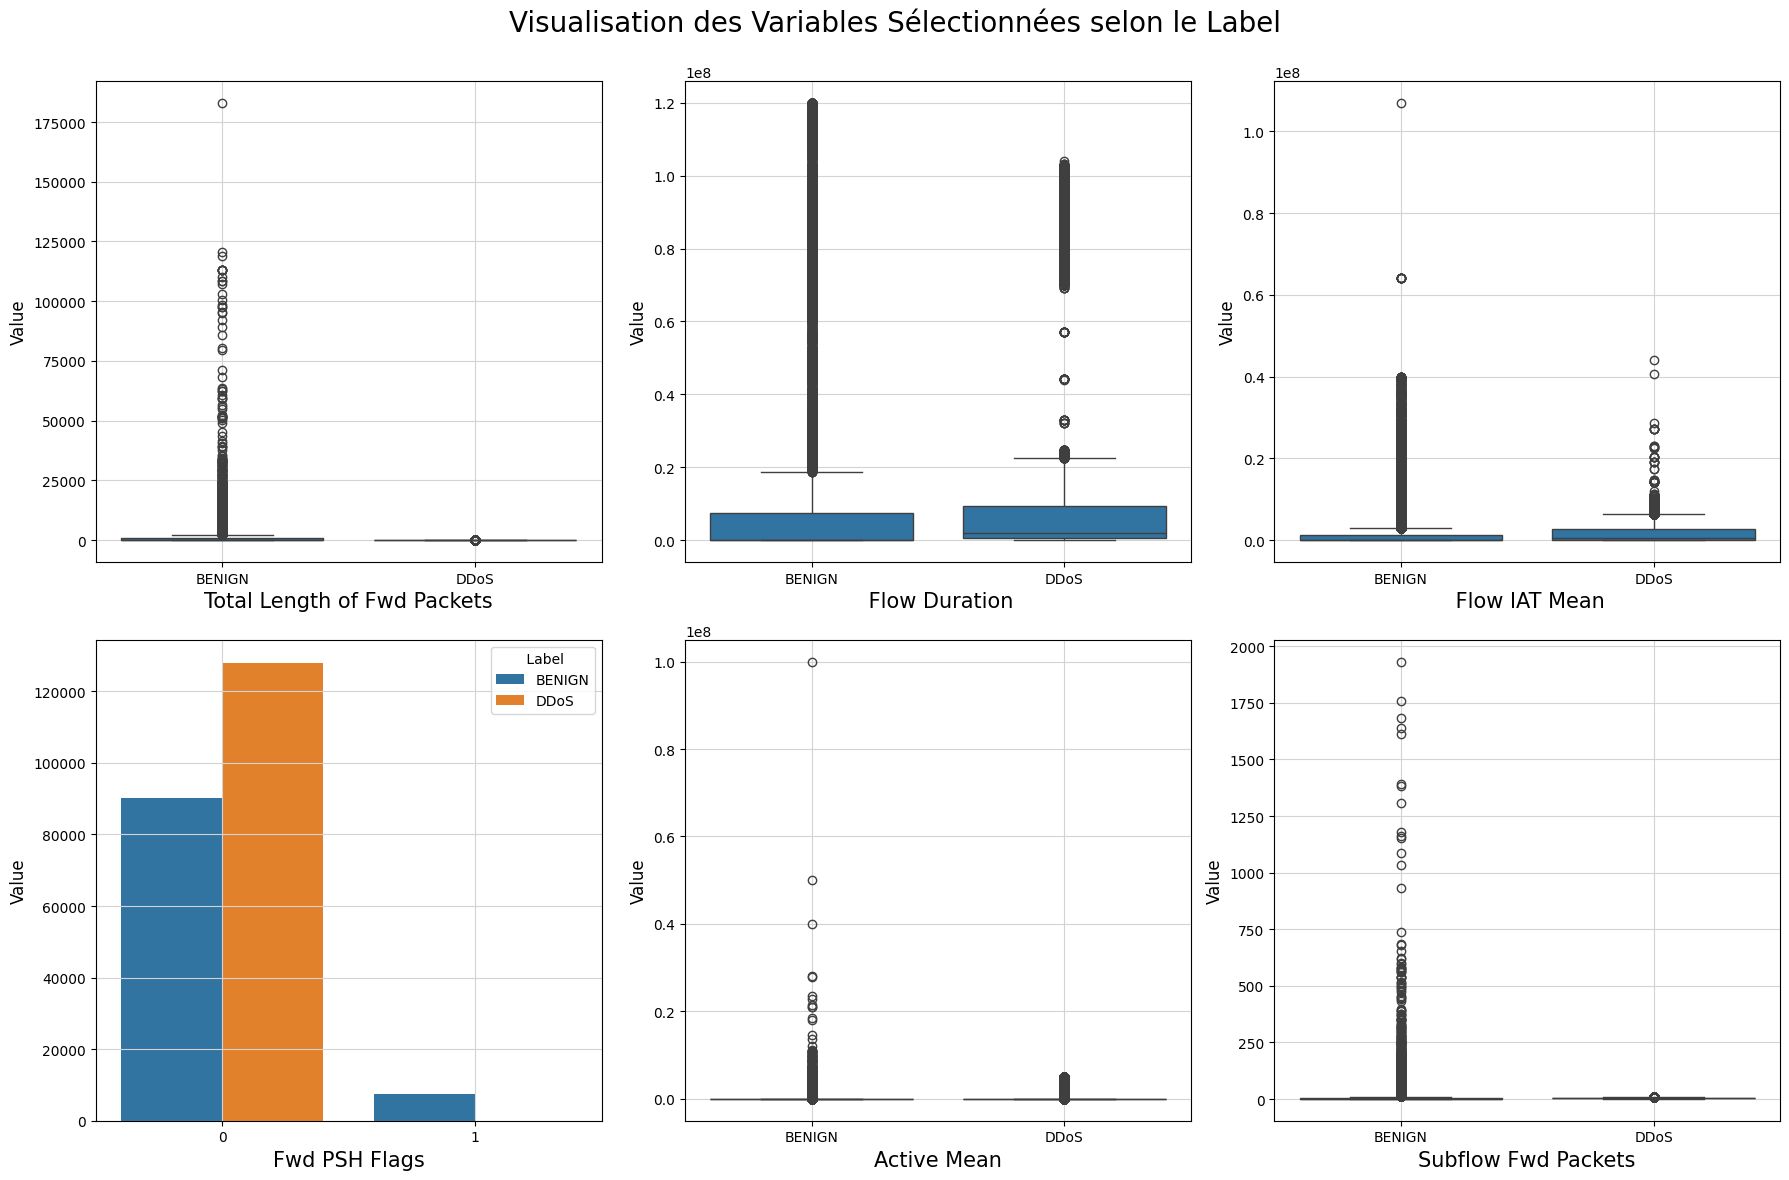

In [ ]:
# Liste des colonnes à tracer
columns_to_plot = ['Total Length of Fwd Packets', ' Flow Duration', ' Flow IAT Mean', 'Fwd PSH Flags', 'Active Mean', 'Subflow Fwd Packets']

# Créez une grille de 2x3 pour afficher 6 graphiques
fig, ax = plt.subplots(2, 3, figsize=(18, 12))  # 2 lignes, 3 colonnes

# Parcourir les colonnes sélectionnées
for i, col in enumerate(columns_to_plot):
    x = i // 3  # Ligne (grille 2x3)
    y = i % 3   # Colonne (grille 2x3)

    # Vérification si la colonne est catégorielle ou continue
    if df[col].dtype == 'object' or df[col].nunique() < 10:  # C'est une colonne catégorielle
        sns.countplot(data=df, x=col, hue=' Label', ax=ax[x, y])
    else:  # Colonne continue
        sns.boxplot(data=df, x=' Label', y=col, ax=ax[x, y])

    # Ajuster les labels et ajouter des annotations
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count' if df[col].dtype == 'object' else 'Value', fontsize=12)
    ax[x, y].grid(color='lightgrey')

# Titre principal
plt.suptitle('Visualisation des Variables Sélectionnées selon le Label', fontsize=20)

# Ajustement des espaces entre les graphiques
plt.tight_layout()
plt.subplots_adjust(top=0.92)

# Afficher le graphique
plt.show()

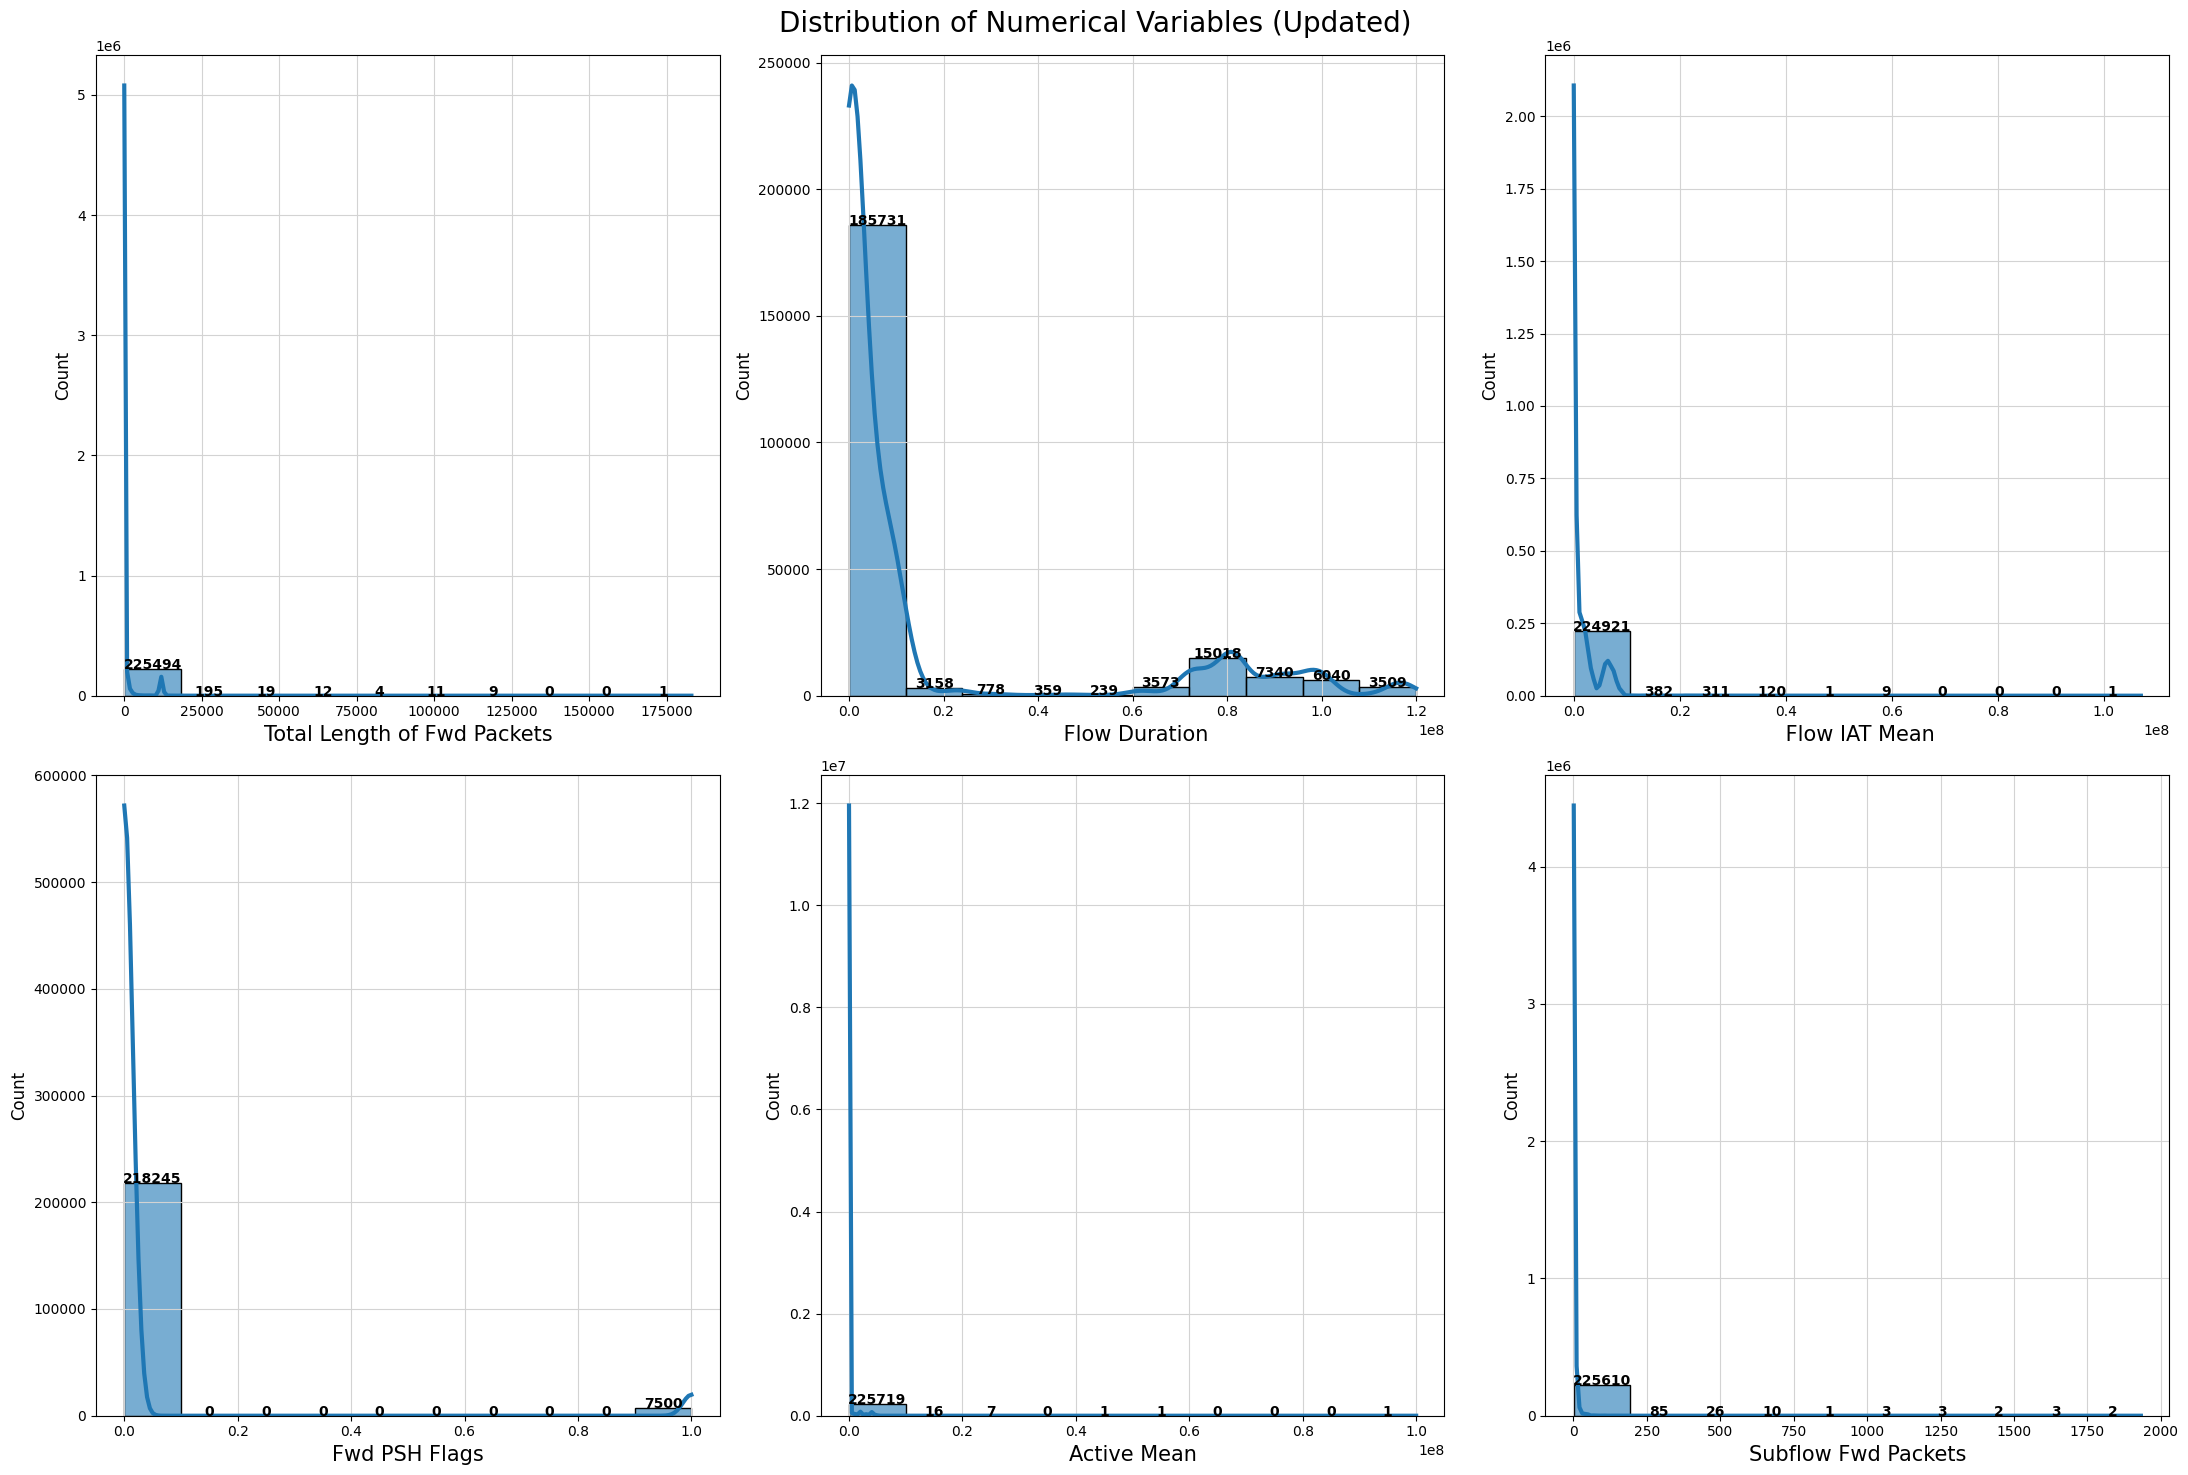

In [ ]:
# Liste des nouvelles colonnes à afficher
columns_to_plot = ['Total Length of Fwd Packets',  ' Flow Duration', ' Flow IAT Mean', 'Fwd PSH Flags', 'Active Mean', 'Subflow Fwd Packets']
df_numerical = df[columns_to_plot]  # Inclure les colonnes spécifiées

# Ajuster la taille de la grille en fonction du nombre de colonnes numériques
n_cols = len(df_numerical.columns)  # Nombre de colonnes numériques
n_rows = (n_cols + 2) // 3  # Calcul dynamique pour une grille de sous-graphiques

fig, ax = plt.subplots(n_rows, 3, figsize=(22, 15))  # Grille 2x3 (ajustement automatique)
ax = ax.flatten()  # Aplatir les sous-graphiques pour un parcours facile

# Boucle sur les colonnes numériques pour tracer les graphiques
for i, col in enumerate(df_numerical.columns):
    values, bin_edges = np.histogram(
        df_numerical[col],
        range=(np.floor(df_numerical[col].min()), np.ceil(df_numerical[col].max()))
    )

    graph = sns.histplot(
        data=df_numerical, x=col, bins=bin_edges, kde=True, ax=ax[i],
        alpha=0.6, line_kws={'lw': 3}
    )

    ax[i].set_xlabel(col, fontsize=15)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].grid(color='lightgrey')

    # Annoter chaque barre du graphique
    for j, p in enumerate(graph.patches):
        ax[i].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                       ha='center', fontsize=10, fontweight="bold")

# Désactiver les sous-graphiques inutilisés
for j in range(i + 1, len(ax)):
    ax[j].axis('off')

# Titre global
plt.suptitle('Distribution of Numerical Variables (Updated)', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

#Nettoyage des données#

Supprimer les duplicatas

In [ ]:
df_cleaned = df.drop_duplicates()

Supprimer les espaces au debut et a la fin de colonne.

In [ ]:
# Strip leading and trailing spaces from column names
df_cleaned.columns = df_cleaned.columns.str.strip()

df_cleaned.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

Fonction pour supprimer les colonnes qui sont correlées

In [ ]:
def remove_highly_correlated_columns(data, threshold=0.8, label_column='Label'):
    """
    Supprime les colonnes avec une corrélation élevée au-dessus d'un seuil spécifié,
    sauf si l'une des colonnes correspond à la colonne `label_column`.

    Arguments :
    - data : DataFrame pandas
    - threshold : Seuil de corrélation pour considérer deux colonnes comme corrélées (par défaut 0.8).
    - label_column : Nom de la colonne qui ne doit pas être supprimée, même si elle est corrélée.

    Retourne :
    - Un DataFrame avec les colonnes corrélées supprimées.
    - Une liste des colonnes supprimées.
    """
    # Sélectionner uniquement les colonnes numériques
    numeric_data = data.select_dtypes(include=[np.number])

    # Calculer la matrice de corrélation
    corr_matrix = numeric_data.corr()

    # Créer un set pour stocker les colonnes à supprimer
    to_drop = set()

    # Parcourir la matrice de corrélation
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            # Récupérer les noms des colonnes
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]

            # Vérifier si la corrélation est supérieure au seuil
            if abs(corr_matrix.loc[col1, col2]) > threshold:
                # Si l'une des colonnes est la colonne Label, ne pas supprimer
                if label_column in [col1, col2]:
                    continue

                # Ajouter la colonne à supprimer (on garde la première et supprime la seconde)
                to_drop.add(col2)

    # Supprimer les colonnes corrélées
    cleaned_data = data.drop(columns=to_drop)

    return cleaned_data, list(to_drop)


In [ ]:
cleaned_data, dropped_columns = remove_highly_correlated_columns(df_cleaned, threshold=0.8)
# Afficher les colonnes supprimées
print("Nombre de colonnes supprimées en raison d'une corrélation élevée :", len(dropped_columns))
print("Colonnes supprimées en raison d'une corrélation élevée :", dropped_columns)

Nombre de colonnes supprimées en raison d'une corrélation élevée : 39
Colonnes supprimées en raison d'une corrélation élevée : ['Fwd IAT Total', 'Idle Max', 'Packet Length Mean', 'act_data_pkt_fwd', 'Flow IAT Max', 'Bwd IAT Min', 'Subflow Bwd Bytes', 'ECE Flag Count', 'Fwd Header Length', 'Fwd Header Length.1', 'Bwd Packet Length Mean', 'Active Min', 'Fwd IAT Mean', 'Total Backward Packets', 'Max Packet Length', 'Average Packet Size', 'Bwd Packet Length Std', 'Idle Mean', 'Fwd Packet Length Max', 'Fwd Packets/s', 'Flow IAT Std', 'Bwd IAT Max', 'Active Max', 'Fwd Packet Length Mean', 'Total Length of Bwd Packets', 'Fwd Packet Length Std', 'Avg Bwd Segment Size', 'Bwd Header Length', 'SYN Flag Count', 'Idle Min', 'Avg Fwd Segment Size', 'Packet Length Variance', 'Bwd IAT Std', 'Fwd IAT Max', 'Packet Length Std', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Fwd Packets', 'Fwd IAT Std']


In [ ]:
cleaned_data.shape

(223112, 40)

In [ ]:
print(cleaned_data.columns)

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Length of Fwd Packets', 'Fwd Packet Length Min',
       'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Min', 'Fwd IAT Min',
       'Bwd IAT Total', 'Bwd IAT Mean', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Bwd Packets/s', 'Min Packet Length',
       'FIN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'Down/Up Ratio',
       'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active Mean', 'Active Std', 'Idle Std',
       'Label'],
      dtype='object')


 Vérifier les valeurs infinies par colonne

In [ ]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = cleaned_data.select_dtypes(include=[np.number])
infinity_counts = np.isinf(numeric_columns).sum()
print("Nombre de valeurs infinies par colonne :")
print(infinity_counts)

Nombre de valeurs infinies par colonne :
Destination Port                0
Flow Duration                   0
Total Fwd Packets               0
Total Length of Fwd Packets     0
Fwd Packet Length Min           0
Bwd Packet Length Max           0
Bwd Packet Length Min           0
Flow Bytes/s                   26
Flow Packets/s                 30
Flow IAT Mean                   0
Flow IAT Min                    0
Fwd IAT Min                     0
Bwd IAT Total                   0
Bwd IAT Mean                    0
Fwd PSH Flags                   0
Bwd PSH Flags                   0
Fwd URG Flags                   0
Bwd URG Flags                   0
Bwd Packets/s                   0
Min Packet Length               0
FIN Flag Count                  0
RST Flag Count                  0
PSH Flag Count                  0
ACK Flag Count                  0
URG Flag Count                  0
CWE Flag Count                  0
Down/Up Ratio                   0
Fwd Avg Bytes/Bulk              0
Fwd Avg

Supprimer les lignes contenant des valeurs infinies

In [ ]:
cleaned_data = cleaned_data[~cleaned_data.isin([np.inf, -np.inf]).any(axis=1)]
# Vérification après suppression
print("Nombre de valeurs infinies restantes par colonne :")
print(cleaned_data.isin([np.inf, -np.inf]).sum())

Nombre de valeurs infinies restantes par colonne :
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Length of Fwd Packets    0
Fwd Packet Length Min          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Min                   0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Fwd PSH Flags                  0
Bwd PSH Flags                  0
Fwd URG Flags                  0
Bwd URG Flags                  0
Bwd Packets/s                  0
Min Packet Length              0
FIN Flag Count                 0
RST Flag Count                 0
PSH Flag Count                 0
ACK Flag Count                 0
URG Flag Count                 0
CWE Flag Count                 0
Down/Up Ratio                  0
Fwd Avg Bytes/Bulk             0
Fwd Avg Packets/Bulk     

Traitement des valeurs aberrantes

In [ ]:
cleaned_data_c = cleaned_data.iloc[:,:-1]


# Calculer les Z-scores pour les colonnes numériques
z_scores = stats.zscore(cleaned_data_c.select_dtypes(include=['float64', 'int64']))

# Convertir les Z-scores en DataFrame pour un accès plus facile
z_scores_df = pd.DataFrame(z_scores, columns=cleaned_data_c.select_dtypes(include=['float64', 'int64']).columns)

# Identifier les outliers: un Z-score > 3 ou < -3
outliers = (z_scores_df.abs() > 3)

# Compter le nombre de lignes avec des outliers
outliers_lines = outliers.any(axis=1).sum()
print(f'Nombre de lignes ayant des outliers : {outliers_lines}')

# Nombre total de lignes
total_lines = cleaned_data_c.shape[0]

# Calcul du pourcentage de lignes avec des outliers
outliers_percentage = (outliers_lines / total_lines)*100
print(f'Pourcentage de lignes ayant des outliers : {outliers_percentage:.2f}%')

Nombre de lignes ayant des outliers : 63057
Pourcentage de lignes ayant des outliers : 28.27%


Imputation des valeurs aberrantes par la médiane

In [ ]:
# Appliquer l'imputation des outliers avec la médiane de chaque colonne
for col in cleaned_data.select_dtypes(include=['float64', 'int64']).columns:
    # Calculer la médiane de la colonne
    median = cleaned_data[col].median()

    # Remplacer les outliers (Z-score > 3 ou < -3) par la médiane
    cleaned_data[col] = np.where(outliers[col], median, cleaned_data[col])

# Afficher les données après imputation des outliers
print("Données après imputation des outliers")
print(cleaned_data.head())

Données après imputation des outliers
   Destination Port  Flow Duration  Total Fwd Packets  \
0           54865.0            3.0                2.0   
1           55054.0          109.0                1.0   
2           55055.0           52.0                1.0   
3           46236.0           34.0                1.0   
4           54863.0            3.0                2.0   

   Total Length of Fwd Packets  Fwd Packet Length Min  Bwd Packet Length Max  \
0                         12.0                    6.0                    0.0   
1                          6.0                    6.0                    6.0   
2                          6.0                    6.0                    6.0   
3                          6.0                    6.0                    6.0   
4                         12.0                    6.0                    0.0   

   Bwd Packet Length Min  Flow Bytes/s  Flow Packets/s  Flow IAT Mean  ...  \
0                    0.0  4.000000e+06        4.973057      

Distribution de resultat(Label)

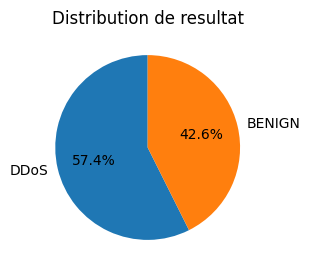

In [ ]:
plt.figure(figsize = (3,3))
plt.pie(cleaned_data.iloc[:,-1].value_counts().values,
        labels=cleaned_data.iloc[:,-1].value_counts().index,
        autopct='%1.1f%%',
        startangle=90)
plt.title("Distribution de resultat")
plt.show()

Faire l'encodeage a la label

In [ ]:
# Mapper les valeurs dans la colonne Label
cleaned_data['Label'] = cleaned_data['Label'].map({'BENIGN': 0, 'DDoS': 1})

# Vérifier les changements
print(cleaned_data['Label'].unique())

[0 1]


In [ ]:
# Compte des NaN par colonne
nan_per_column = cleaned_data.isna().sum()
print(nan_per_column)

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Length of Fwd Packets    0
Fwd Packet Length Min          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Min                   0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Fwd PSH Flags                  0
Bwd PSH Flags                  0
Fwd URG Flags                  0
Bwd URG Flags                  0
Bwd Packets/s                  0
Min Packet Length              0
FIN Flag Count                 0
RST Flag Count                 0
PSH Flag Count                 0
ACK Flag Count                 0
URG Flag Count                 0
CWE Flag Count                 0
Down/Up Ratio                  0
Fwd Avg Bytes/Bulk             0
Fwd Avg Packets/Bulk           0
Fwd Avg Bulk Rate              0
Bwd Avg By

In [ ]:
# Calcul de la médiane de la colonne : parce qu'on a une distribution asymétrique
median_value = cleaned_data['Flow Bytes/s'].median()

# Remplacement des NaN par la médiane
cleaned_data['Flow Bytes/s'].fillna(median_value, inplace=True)

# Vérification
print(cleaned_data['Flow Bytes/s'].isna().sum())  # Doit afficher 0

0


Séparer les attributs et la variable cible

In [ ]:
X = cleaned_data.iloc[:,:-1]
Y = cleaned_data.iloc[:,-1]

Standarisation des données

In [ ]:
# Vérifier les valeurs infinies
print(np.isinf(X).sum())  # Nombre de valeurs infinies par colonne

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Length of Fwd Packets    0
Fwd Packet Length Min          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Min                   0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Fwd PSH Flags                  0
Bwd PSH Flags                  0
Fwd URG Flags                  0
Bwd URG Flags                  0
Bwd Packets/s                  0
Min Packet Length              0
FIN Flag Count                 0
RST Flag Count                 0
PSH Flag Count                 0
ACK Flag Count                 0
URG Flag Count                 0
CWE Flag Count                 0
Down/Up Ratio                  0
Fwd Avg Bytes/Bulk             0
Fwd Avg Packets/Bulk           0
Fwd Avg Bulk Rate              0
Bwd Avg By

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

Code pour avoir des données equilibrées

In [ ]:
# Vérifier la distribution des classes avant oversampling
print("Class distribution before oversampling:")
print("Class 0 samples:", np.sum(Y == 0))  # Classe 0
print("Class 1 samples:", np.sum(Y == 1))  # Classe 1

# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# Vérifier la distribution des classes après oversampling
print("\nClass distribution after oversampling:")
print("Class 0 samples:", np.sum(Y_resampled == 0))  # Classe 0
print("Class 1 samples:", np.sum(Y_resampled == 1))  # Classe 1

Class distribution before oversampling:
Class 0 samples: 95068
Class 1 samples: 128014

Class distribution after oversampling:
Class 0 samples: 128014
Class 1 samples: 128014


Preparation des données(train test)  

In [ ]:
# Supposons que X est votre DataFrame des features (variables explicatives)
# et Y est votre variable cible (label)

# Diviser les données en jeu d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Affichage des tailles des jeux de données
print("Taille du jeu d'entraînement :", X_train.shape, Y_train.shape)
print("Taille du jeu de test :", X_test.shape, Y_test.shape)

Taille du jeu d'entraînement : (156157, 39) (156157,)
Taille du jeu de test : (66925, 39) (66925,)


#**Apprentissage supervisé**


 **1- K-Nearest Neighbors (KNN)**

Tunning des paramètres

In [ ]:
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

Training

In [ ]:
grid_search.fit(X_train, Y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


Test

In [ ]:
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test)

Accuracy

In [ ]:
accuracy = accuracy_score(Y_test, y_pred_knn)
print("Accuracy on Test Set: {:.2f}%".format(accuracy * 100))

Autres mésures

In [ ]:
print(classification_report(Y_test, y_pred_knn, target_names=['0','1']))

Matrice de confusion

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(Y_test, y_pred_knn)).plot()

 **2- Random forest**

Tuning des parametres

In [ ]:
# Initialiser le modèle
rf = RandomForestClassifier(random_state=42)
# Grille d'hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],  # Nombre minimum d'échantillons pour une feuille
    'bootstrap': [True, False]  # Méthode de bootstrap
}

Training

In [ ]:
# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=3, n_jobs=-1)
grid_search.fit(X_train, Y_train)
# Afficher les meilleurs hyperparamètres
print("Best parameters found:", grid_search.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


Test

In [ ]:
# Utiliser le meilleur modèle pour les prédictions
best_rf = grid_search.best_estimator_
# Prédictions
y_pred = best_rf.predict(X_test)


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

Accuracy

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy * 100:.2f}%")

NameError: name 'y_pred' is not defined

Classification Report

In [ ]:
print(classification_report(Y_test, y_pred))

Autre mesure

In [ ]:
print(confusion_matrix(Y_test, y_pred))

**3- Naive Bayesienne-Brnoulli (NB)**

In [ ]:
from sklearn.naive_bayes import GaussianNB

tuning des hyperparametre

In [ ]:
from sklearn.naive_bayes import BernoulliNB
# Tuning des paramètres pour BernoulliNB
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
    'binarize': [0.0, 0.5, 1.0]
}
grid_search = GridSearchCV(BernoulliNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
                         'binarize': [0.0, 0.5, 1.0]},
             scoring='accuracy')

In [ ]:
# Meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)

Meilleurs paramètres : {'alpha': 0.1, 'binarize': 0.0}


Entraîner le modèle avec les meilleurs paramètres

In [ ]:
# Entraîner le modèle avec les meilleurs paramètres
best_nb_model = grid_search.best_estimator_

In [ ]:
# Évaluation des performances
print("Rapport de classification (Naive Bayes - Bernoulli, meilleur modèle):\n", metrics.classification_report(Y_test, y_pred_nb))
print("Matrice de confusion (Naive Bayes - Bernoulli, meilleur modèle):\n", metrics.confusion_matrix(Y_test, y_pred_nb))

Rapport de classification (Naive Bayes - Bernoulli, meilleur modèle):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     28491
           1       0.99      1.00      0.99     38434

    accuracy                           0.99     66925
   macro avg       0.99      0.99      0.99     66925
weighted avg       0.99      0.99      0.99     66925

Matrice de confusion (Naive Bayes - Bernoulli, meilleur modèle):
 [[28040   451]
 [   53 38381]]


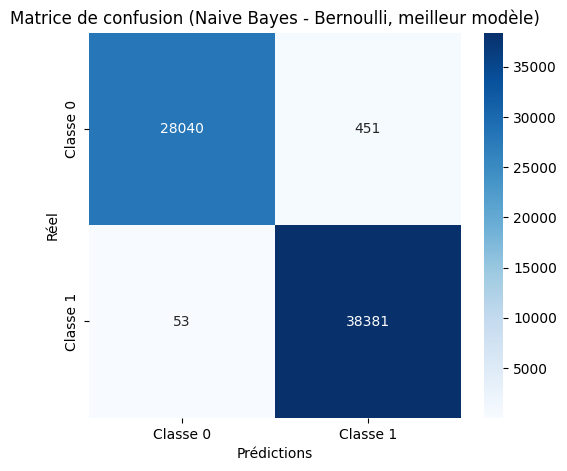

In [ ]:
# Générer la matrice de confusion
conf_matrix = metrics.confusion_matrix(Y_test, y_pred_nb)

# Tracer la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion (Naive Bayes - Bernoulli, meilleur modèle)')
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.show()

**5- Support Vector Machines (SVM)**

In [ ]:
from sklearn.svm import SVC

Tuning des hyberparametres et training avec le meilleur modèle

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],  # Réduction des valeurs de C pour un tuning plus rapide
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, Y_train)

# Meilleurs paramètres trouvés pour SVM
print("Meilleurs paramètres (SVM):", grid_search_svm.best_params_)

Meilleurs paramètres (SVM): {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


Test

In [ ]:
# Entraîner le modèle avec les meilleurs paramètres pour SVM
best_svm = grid_search_svm.best_estimator_
best_svm.fit(X_train, Y_train)

# Prédictions sur le test set pour SVM
y_pred_svm = best_svm.predict(X_test)

# Évaluation des performances pour SVM
print("Rapport de classification (SVM, meilleur modèle):\n", metrics.classification_report(Y_test, y_pred_svm))
print("Matrice de confusion (SVM, meilleur modèle):\n", metrics.confusion_matrix(Y_test, y_pred_svm))


Rapport de classification (SVM, meilleur modèle):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28491
           1       1.00      1.00      1.00     38434

    accuracy                           1.00     66925
   macro avg       1.00      1.00      1.00     66925
weighted avg       1.00      1.00      1.00     66925

Matrice de confusion (SVM, meilleur modèle):
 [[28471    20]
 [   22 38412]]


matrice de confusion

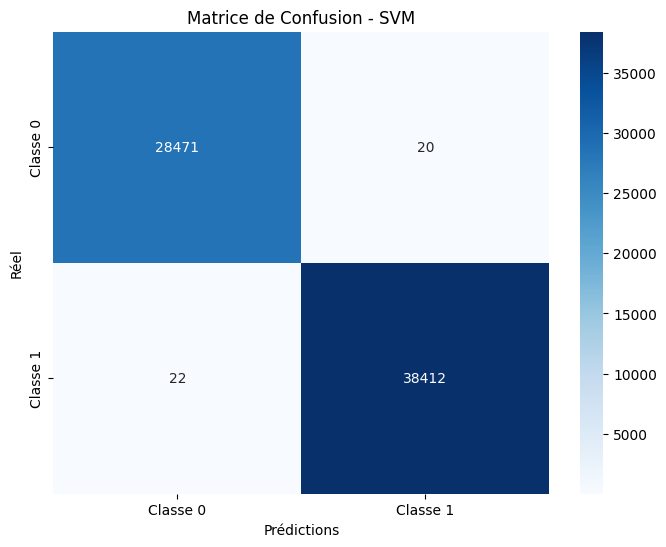

In [ ]:
# Visualisation de la matrice de confusion
conf_matrix_svm = metrics.confusion_matrix(Y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de Confusion - SVM')
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.show()

#**Apprentissage non supervisé**:

##**K-means**

#### determination du nombre de cluster =>Méthode du Coude (Elbow Method) :

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)


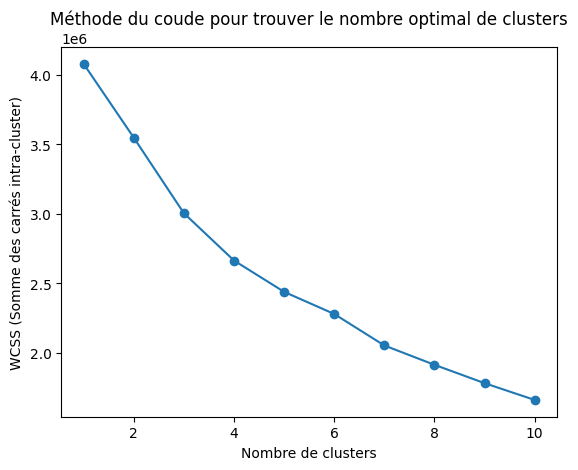

In [ ]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Méthode du coude pour trouver le nombre optimal de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS (Somme des carrés intra-cluster)')
plt.show()

####=> Coefficient Silhouette

In [ ]:
from sklearn.metrics import silhouette_score
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print(f"Silhouette Score pour nombre de clusters {i} : {silhouette_avg}")


Silhouette Score pour nombre de clusters 2 : 0.31907906343113207
Silhouette Score pour nombre de clusters 3 : 0.3284256416808819
Silhouette Score pour nombre de clusters 4 : 0.37059000707548617
Silhouette Score pour nombre de clusters 5 : 0.3885735668695945
Silhouette Score pour nombre de clusters 6 : 0.40351984675074537
Silhouette Score pour nombre de clusters 7 : 0.45351273217408256
Silhouette Score pour nombre de clusters 8 : 0.4622203371417872
Silhouette Score pour nombre de clusters 9 : 0.4689419809058217
Silhouette Score pour nombre de clusters 10 : 0.4811883298539905


####=>Coefficient de Davies-Bouldin

In [ ]:
from sklearn.metrics import davies_bouldin_score
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_train)
    db_score = davies_bouldin_score(X_train, cluster_labels)
    print(f"Coefficient de Davies-Bouldin pour nombre de clusters {i} : {db_score}")


Coefficient de Davies-Bouldin pour nombre de clusters 2 : 1.5520188400503399
Coefficient de Davies-Bouldin pour nombre de clusters 3 : 1.4756785372702
Coefficient de Davies-Bouldin pour nombre de clusters 4 : 1.3825760730833678
Coefficient de Davies-Bouldin pour nombre de clusters 5 : 1.2373373670636245
Coefficient de Davies-Bouldin pour nombre de clusters 6 : 1.1265883094836922
Coefficient de Davies-Bouldin pour nombre de clusters 7 : 1.4108230896301002
Coefficient de Davies-Bouldin pour nombre de clusters 8 : 1.267661585390814
Coefficient de Davies-Bouldin pour nombre de clusters 9 : 1.215229570713982
Coefficient de Davies-Bouldin pour nombre de clusters 10 : 1.1616578666731932


k_means pour les k qui sont determiner

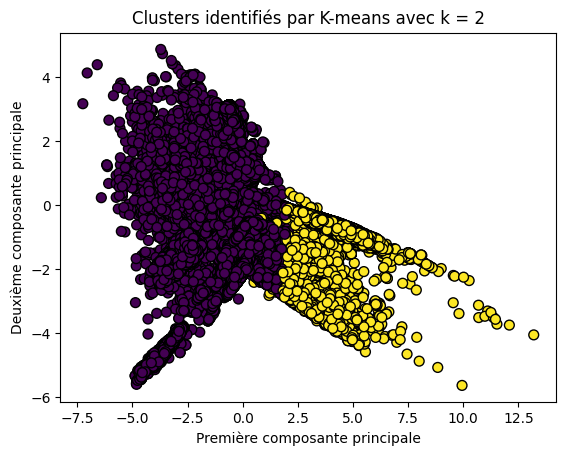

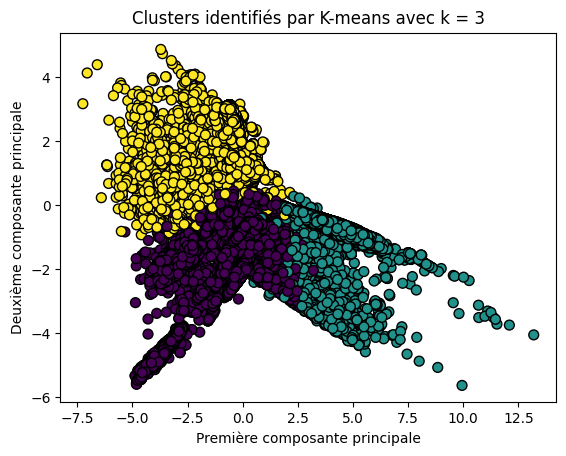

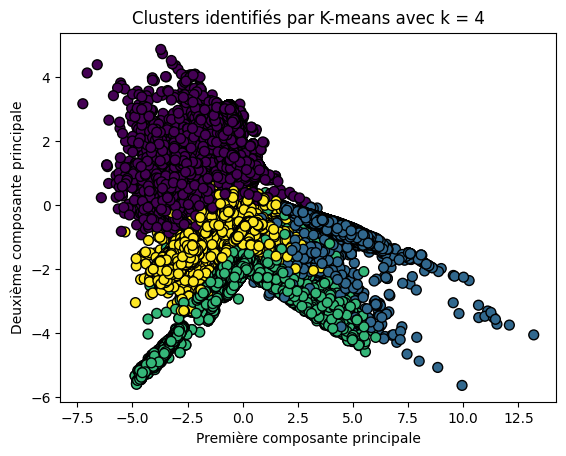

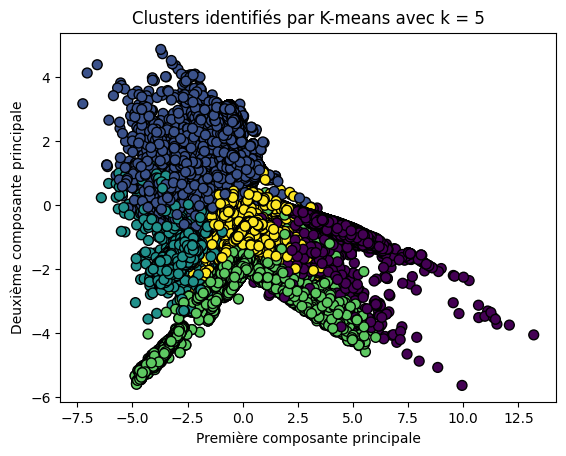

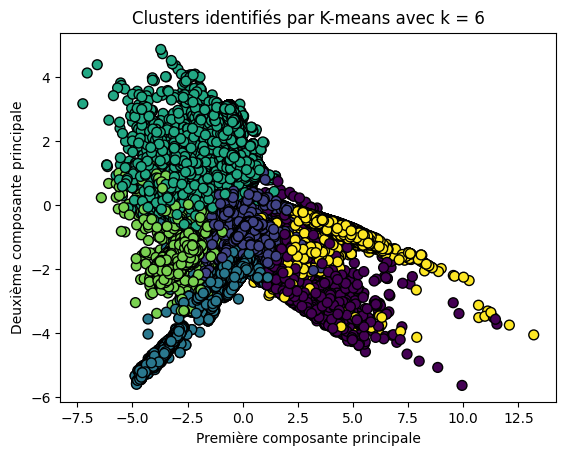

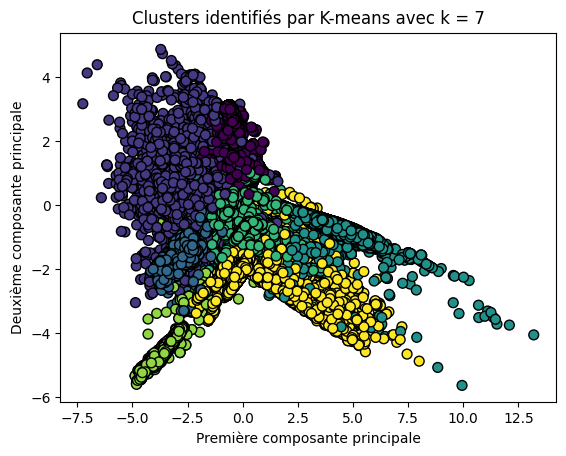

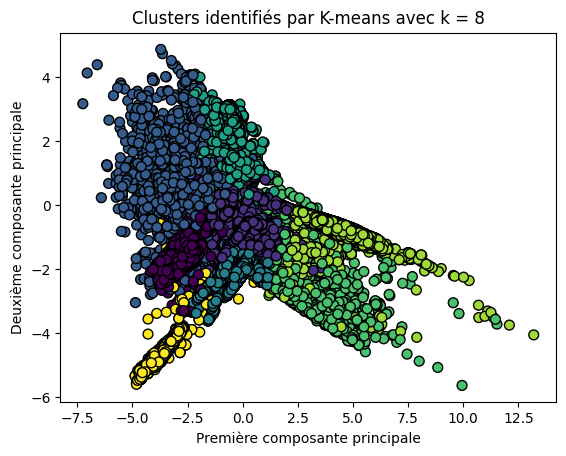

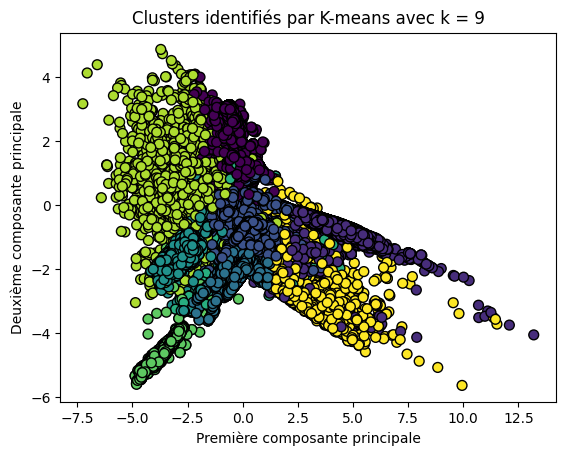

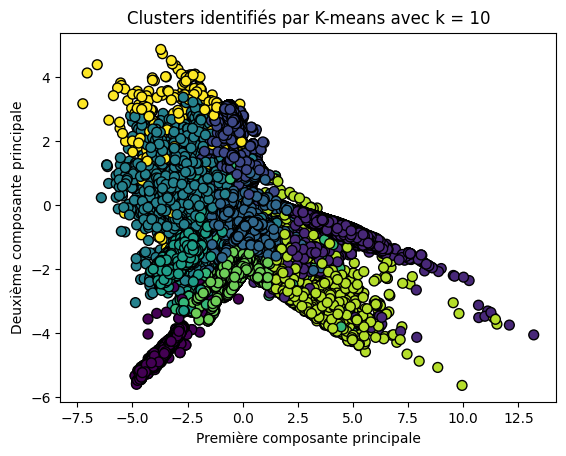

In [ ]:
from sklearn.decomposition import PCA

# Application de PCA (réduction à 2 dimensions pour visualisation)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Boucle pour tester différents nombres de clusters (k de 2 à 10)
for i in range(2, 11):
    # Application de K-means
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_train)

    # Visualisation des clusters
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=50)
    plt.title(f"Clusters identifiés par K-means avec k = {i}")
    plt.xlabel('Première composante principale')
    plt.ylabel('Deuxième composante principale')
    plt.show()


In [ ]:
from sklearn.decomposition import PCA
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=50)
    plt.title(f"Clusters identifiés par K-means avec k est : {i} ")
    plt.xlabel('Première composante principale')
    plt.ylabel('Deuxième composante principale')
    plt.show()



### **k_means**

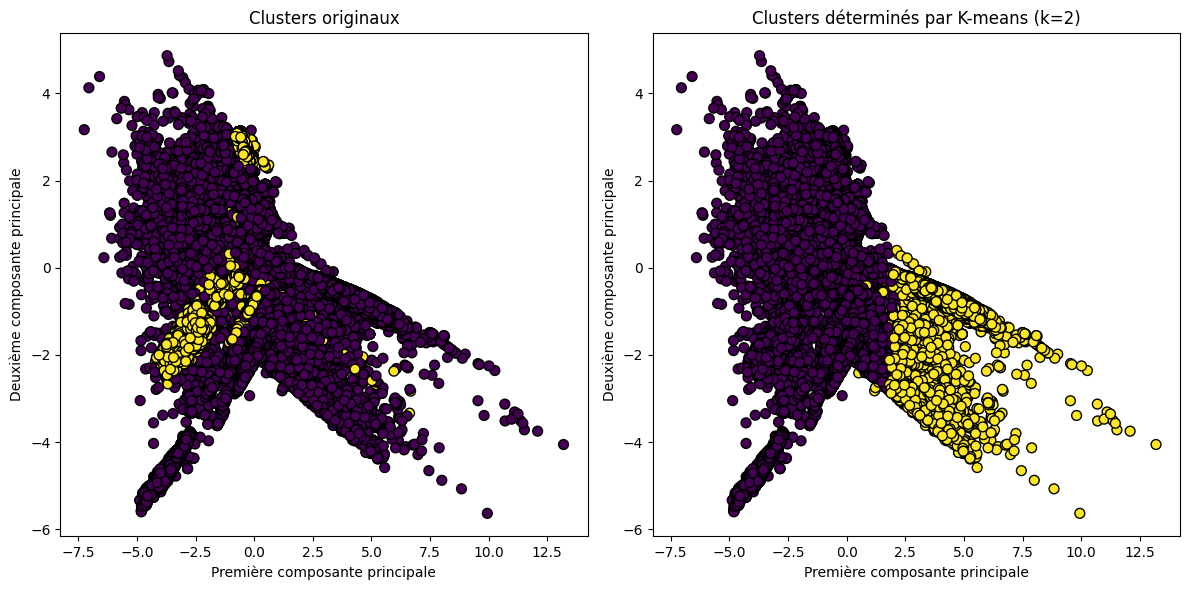

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Réduction de dimension avec PCA (2 composantes)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Visualisation des clusters originaux
plt.figure(figsize=(12, 6))

# 1. Visualisation des clusters originaux
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y_train, cmap='viridis', edgecolors='k', s=50)
plt.title("Clusters originaux")
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')

# 2. Application de K-means avec k=2
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_train)

# Visualisation des clusters K-means
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=50)
plt.title("Clusters déterminés par K-means (k=2)")
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')

# Affichage des deux graphiques côte à côte
plt.tight_layout()
plt.show()


# **Clustering Hierarchique**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [ ]:
n_clusters = 2

cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='complete')
cluster_labels = cluster.fit_predict(X_train)
unique_labels, counts = np.unique(cluster_labels, return_counts=True)

In [ ]:
for cluster, count in zip(unique_labels, counts):
    print(f"Cluster {cluster}: {count} éléments")

### Dendogramme

In [ ]:
z = linkage(X_scaled,"ward")

dendrogram(z,truncate_mode= "lastp", p =20, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()

In [ ]:
z = linkage(X_scaled,"average")

dendrogram(z,truncate_mode= "lastp", p =20, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()

In [ ]:
z = linkage(X_scaled,"complete")

dendrogram(z,truncate_mode= "lastp", p =20, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()

In [ ]:
z = linkage(X_scaled,"single")


dendrogram(z,truncate_mode= "lastp", p =20, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()

In [ ]:
# Tracer le graphique des clusters

for i in range(2, 11):
    cluster = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='complete')
    cluster_labels = cluster.fit_predict(X_scaled)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=50)
    plt.title(f"Clusters identifiés par Clusteri avec k est : {i} ")
    plt.xlabel('Première composante principale')
    plt.ylabel('Deuxième composante principale')
    plt.show()


In [ ]:
for i in range(2, 11):
    cluster = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='average')
    cluster_labels = cluster.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Silhouette Score pour nombre de clusters {i} : {silhouette_avg}")


# **Neural network : MLP**


Application de PCA pour réduire la dimensionnalité

In [ ]:
# Application de PCA pour réduire la dimensionnalité
pca = PCA(n_components=0.95)  # Garder 95% de la variance
X_pca = pca.fit_transform(X_scaled)

3. Fonction de construction du modèle MLP

In [ ]:
# Fonction pour construire le modèle Keras
def create_model(learning_rate=0.001, dropout_rate=0.2, units=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_dim=X_train.shape[1]))  # Taille de l'entrée
    model.add(Dropout(dropout_rate))
    model.add(Dense(units, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Sortie pour classification binaire

    # Définir l'optimiseur
    if optimizer == 'adam':
        optimizer_instance = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer_instance = RMSprop(learning_rate=learning_rate)

    # Compiler le modèle
    model.compile(optimizer=optimizer_instance, loss='binary_crossentropy', metrics=['accuracy'])
    return model


Création du modèle Keras

In [ ]:
# Création du modèle Keras pour une utilisation avec scikit-learn
modelMLP = KerasClassifier(model=create_model, epochs=50, verbose=2)

Paramètres à tester dans RandomizedSearchCV

In [ ]:
param_dist = {
    'model__activation': ['relu', 'tanh', 'sigmoid'],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'model__units': [32, 64, 128],
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__optimizer': [Adam, 'sgd', 'rmsprop'],
    'batch_size': [32, 64, 128]
}

 Utilisation de Random Search pour la recherche des meilleurs hyperparamètres

In [ ]:
# Utilisation de RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Entraînement du modèle avec Random Search
random_search.fit(X_train, Y_train

In [ ]:
 # Affichage des meilleurs paramètres
print("Meilleurs paramètres :")
print(random_search.best_params_)

Meilleurs paramètres après Random Search

In [ ]:
# Mise à jour des meilleurs paramètres trouvés par Random Search
best_params = random_search.best_params_

# Reconstruction du modèle avec les meilleurs paramètres
model_adjusted = create_model(
    activation=best_params['model__activation'],
    dropout_rate=best_params['model__dropout_rate'],
    units=best_params['model__units'],
    learning_rate=best_params['model__learning_rate'],
    optimizer=best_params['model__optimizer']
)


 Construction du modèle avec régularisation et meilleurs paramètres pour éviter l'overfitting


In [ ]:
# Application de la régularisation L2 pour éviter l'overfitting
model_adjusted = Sequential([
    Dense(best_params['model__units'], activation=best_params['model__activation'],
          kernel_regularizer=l2(0.1)),  # Augmentation de la régularisation L2
    Dropout(best_params['model__dropout_rate']),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle ajusté
model_adjusted.compile(optimizer=best_params['model__optimizer'],
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

# Arrêt précoce pour éviter le surapprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraînement du modèle ajusté
history_adjusted = model_adjusted.fit(
    X_train_scaled, Y_train,
    validation_data=(X_test, Y_test),
    epochs=100,
    batch_size=best_params['batch_size'],
    verbose=1,
    callbacks=[early_stopping]
)


 Affichage des métriques du modèle


In [ ]:
# Prédictions sur les données de test
Y_pred = model_adjusted.predict(X_test)
Y_pred_classes = (Y_pred > 0.5).astype('int32')

# Calcul des métriques
accuracy = accuracy_score(Y_test, Y_pred_classes)
precision = precision_score(Y_test, Y_pred_classes, average=None)
recall = recall_score(Y_test, Y_pred_classes, average=None)
f1 = f1_score(Y_test, Y_pred_classes, average=None)

# Affichage des métriques pour chaque classe
print("Métriques pour chaque classe :")
for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
    print(f"Classe {i}: Précision={p:.4f}, Rappel={r:.4f}, F1-score={f:.4f}")

# Affichage de l'accuracy globale
print(f"\nAccuracy globale: {accuracy:.4f}")

# Rapport de classification complet
print("\nRapport de classification complet :")
print(classification_report(Y_test, Y_pred_classes))


 Matrice de confusion


In [ ]:
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(Y_test, Y_pred_classes)

# Affichage de la matrice de confusion
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.colorbar()
plt.xticks(np.arange(2), ['Classe 0', 'Classe 1'])
plt.yticks(np.arange(2), ['Classe 0', 'Classe 1'])
plt.xlabel('Prédictions')
plt.ylabel('Vérités réelles')
plt.tight_layout()
plt.show()


## **Determiner le nombre de clusters**

### Méthode du Coude (Elbow Method) :

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)



In [ ]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Méthode du coude pour trouver le nombre optimal de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS (Somme des carrés intra-cluster)')
plt.show()



### Coefficient Silhouette

In [ ]:
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Silhouette Score pour nombre de clusters {i} : {silhouette_avg}")


### Coefficient de Davies-Bouldin

In [ ]:
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)
    db_score = davies_bouldin_score(X_scaled, cluster_labels)
    print(f"Coefficient de Davies-Bouldin pour nombre de clusters {i} : {db_score}")


NameError: name 'X_scaled' is not defined

In [ ]:
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=50)
    plt.title(f"Clusters identifiés par K-means avec k est : {i} ")
    plt.xlabel('Première composante principale')
    plt.ylabel('Deuxième composante principale')
    plt.show()



NameError: name 'X_scaled' is not defined

# **Clustering Hierarchique**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [ ]:
n_clusters = 2

cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='complete')
cluster_labels = cluster.fit_predict(X_scaled)
unique_labels, counts = np.unique(cluster_labels, return_counts=True)

In [ ]:
for cluster, count in zip(unique_labels, counts):
    print(f"Cluster {cluster}: {count} éléments")

### Dendogramme

In [ ]:
z = linkage(X_scaled,"ward")

dendrogram(z,truncate_mode= "lastp", p =20, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()

In [ ]:
z = linkage(X_scaled,"average")

dendrogram(z,truncate_mode= "lastp", p =20, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()

In [ ]:
z = linkage(X_scaled,"complete")

dendrogram(z,truncate_mode= "lastp", p =20, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()

In [ ]:
z = linkage(X_scaled,"single")


dendrogram(z,truncate_mode= "lastp", p =20, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()

In [ ]:
# Tracer le graphique des clusters

for i in range(2, 11):
    cluster = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='complete')
    cluster_labels = cluster.fit_predict(X_scaled)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=50)
    plt.title(f"Clusters identifiés par Clusteri avec k est : {i} ")
    plt.xlabel('Première composante principale')
    plt.ylabel('Deuxième composante principale')
    plt.show()


In [ ]:
for i in range(2, 11):
    cluster = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='average')
    cluster_labels = cluster.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Silhouette Score pour nombre de clusters {i} : {silhouette_avg}")
